<a href="https://colab.research.google.com/github/BrayannQuevedoBenito/Ciencia_datos/blob/master/Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install --upgrade pandas-profiling

In [216]:
data=pd.read_csv('https://raw.githubusercontent.com/BrayannQuevedoBenito/Ciencia_datos/master/Data_Taller_2.csv',sep=';').drop_duplicates()

In [217]:
data['Temp'] = data['Temp'].str.replace(',','.')

In [218]:
data['Feel_Temp'] = data['Feel_Temp'].str.replace(',','.')

In [219]:
data['Hum'] = data['Hum'].str.replace(',','.')

In [220]:
data['Wind'] = data['Wind'].str.replace(',','.')

## Se encontró un valor átipico para la fecha

In [221]:
data.loc[data["Date"] == "29/02/2021", "Date"] = "28/02/2021"

In [222]:
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y', errors='coerce')

In [223]:
data['Hum'] = data['Hum'].astype(float)
data['Feel_Temp'] = data['Feel_Temp'].astype(float)
data['Temp'] = data['Temp'].astype(float)
data['Wind'] = data['Wind'].astype(float)

In [224]:
data.head(2)

instant       Date    Season Holiday        Weather      Temp  Feel_Temp  \
0        1 2020-01-01  Springer      No  Mist + Cloudy  8.175849   9.090375   
1        2 2020-01-02  Springer      No  Mist + Cloudy  9.083466   8.625733   

        Hum       Wind  Casual  Registered  cnt  
0  0.805833  10.749882     331         654  985  
1  0.696087 -16.652113     131         670  801

In [225]:
data[data.isna().any(axis=1)]

instant       Date    Season Holiday            Weather  Temp  Feel_Temp  \
99       100 2020-04-10    Summer      No  Mist + Few clouds   NaN  12.056639   
229      230 2020-08-18      Fall      No   Partly    cloudy   NaN  23.126126   
562      563 2021-07-16      Fall      No              Clear   NaN  26.033875   
721      722 2021-12-22  Springer      No   Partly    cloudy   NaN   3.097311   

           Hum       Wind  Casual  Registered   cnt  
99    0.857500   9.833389    1188        1707  2895  
229   0.654583  15.624936     639        3166  3805  
562   0.645000  11.000529    1088        5742  6830  
721  10.441250  27.292182     205        1544  1749

In [226]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


instant        366.000000
Temp            15.271063
Feel_Temp       14.294637
Hum              0.682614
Wind            12.668792
Casual         848.176471
Registered    3656.172367
cnt           4504.348837
dtype: float64

In [227]:
data['Temp']=data['Temp'].fillna(15.27)

In [228]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [instant, Date, Season, Holiday, Weather, Temp, Feel_Temp, Hum, Wind, Casual, Registered, cnt]
Index: []

In [229]:
data['Weather'].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

In [230]:
data.loc[data["Weather"] == " Partly    cloudy", "Weather"] = "Partly cloudy"
data.loc[data["Weather"] == " Partly cloudy", "Weather"] = "Partly cloudy"


In [231]:
data['Weather'].unique()

array(['Mist + Cloudy', 'Few clouds', 'Partly cloudy', 'Clear', 'Mist',
       'Mist + Broken clouds', 'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

In [232]:
data.groupby('Weather').count()

instant  Date  Season  Holiday  Temp  \
Weather                                                               
Clear                              111   111     111      111   111   
Few clouds                         118   118     118      118   118   
Light Rain + Scattered clouds        8     8       8        8     8   
Mist                                54    54      54       54    54   
Mist + Broken clouds                69    69      69       69    69   
Mist + Cloudy                       66    66      66       66    66   
Mist + Few clouds                   58    58      58       58    58   
Partly cloudy                      234   234     234      234   234   
Rain + Thunderstorm                  7     7       7        7     7   
Snow                                 6     6       6        6     6   

                               Feel_Temp  Hum  Wind  Casual  Registered  cnt  
Weather                                                                       
Clear                                111  111   111     111         111  111  
Few clouds                           118  118   118     118         118  118  
Light Rain + Scattered clouds          8    8     8       8           8    8  
Mist                                  54   54    54      54          54   54  
Mist + Broken clouds                  69   69    69      69          69   69  
Mist + Cloudy                         66   66    66      66          66   66  
Mist + Few clouds                     58   58    58      58          58   58  
Partly cloudy                        234  234   234     234         234  234  
Rain + Thunderstorm                    7    7     7       7           7    7  
Snow                                   6    6     6       6           6    6

### En la pestaña interacciones podemos observar el analisis bivariado

In [90]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [233]:
condiciones=[(data['Weather'].str.contains("Mist")),(data['Weather'].str.contains("Rain")),(data['Weather']!="Rain")]
valores=['Mist','Rain','Other']

In [234]:
data['Grupo']=np.select(condiciones,valores)

In [235]:
data['Dia'] = data['Date'].dt.day_name()

In [236]:
data=data.drop(columns='instant')

In [122]:
data

Date    Season Holiday            Weather      Temp Feel_Temp  \
0     1/01/2020  Springer      No      Mist + Cloudy  8,175849  9,090375   
1     2/01/2020  Springer      No      Mist + Cloudy  9,083466  8,625733   
2     3/01/2020  Springer      No         Few clouds  1,229108  0,902035   
3     4/01/2020  Springer      No         Few clouds       1,4  1,969734   
4     5/01/2020  Springer      No   Partly    cloudy  2,666979   2,77569   
..          ...       ...     ...                ...       ...       ...   
726  27/12/2021  Springer      No      Mist + Cloudy  3,945849  2,652174   
727  28/12/2021  Springer      No  Mist + Few clouds  3,906651  3,987162   
728  29/12/2021  Springer      No               Mist  3,906651    3,3928   
729  30/12/2021  Springer      No         Few clouds  4,024151    2,8899   
730  31/12/2021  Springer      No  Mist + Few clouds  2,144151  2,503889   

          Hum        Wind  Casual  Registered   cnt  Grupo  
0    0,805833   10,749882     331         654   985   Mist  
1    0,696087  -16,652113     131         670   801   Mist  
2    0,437273   16,636703     120        1229  1349  Other  
3    0,590435   10,739832     108        1454  1562  Other  
4    0,436957     12,5223      82        1518  1600  Other  
..        ...         ...     ...         ...   ...    ...  
726  0,652917   23,458911     247        1867  2114   Mist  
727      0,59   10,416557     644        2451  3095   Mist  
728  0,752917    8,333661     159        1182  1341   Mist  
729  0,483333   23,500518     364        1432  1796  Other  
730    0,5775   10,374682     439        2290  2729   Mist  

[731 rows x 12 columns]

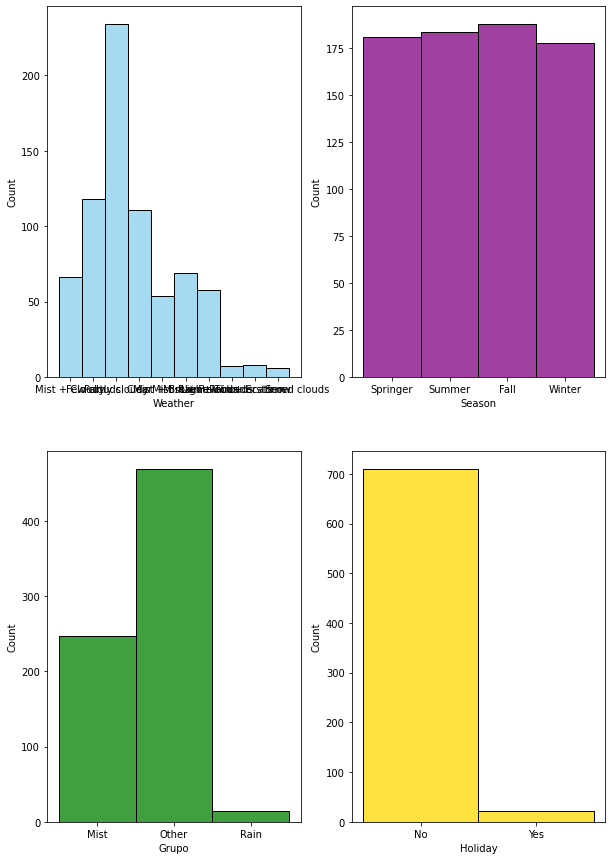

In [237]:
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

sns.histplot(data=data, x="Weather", kde=False, color="skyblue",stat='count', ax=axs[0, 0])
sns.histplot(data=data, x="Grupo", kde=False, color="green",stat='count', ax=axs[1, 0])
sns.histplot(data=data, x="Holiday", kde=False, color="gold",stat='count', ax=axs[1, 1])
sns.histplot(data=data, x="Season", kde=False, color="purple",stat='count', ax=axs[0, 1])

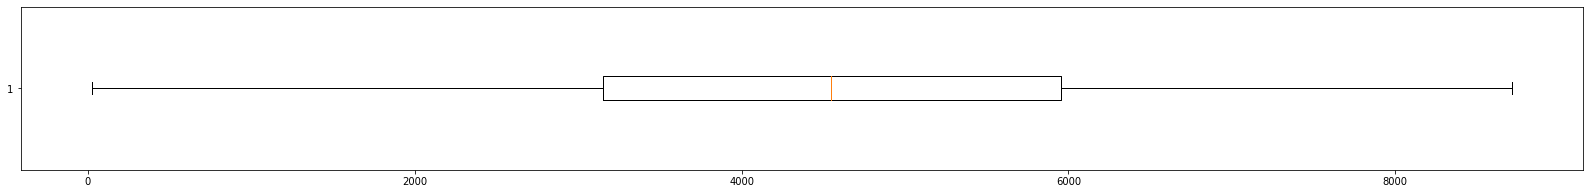

In [238]:
plt.figure(figsize = (28, 3))
plt.boxplot(data['cnt'], vert = False)
plt.show()

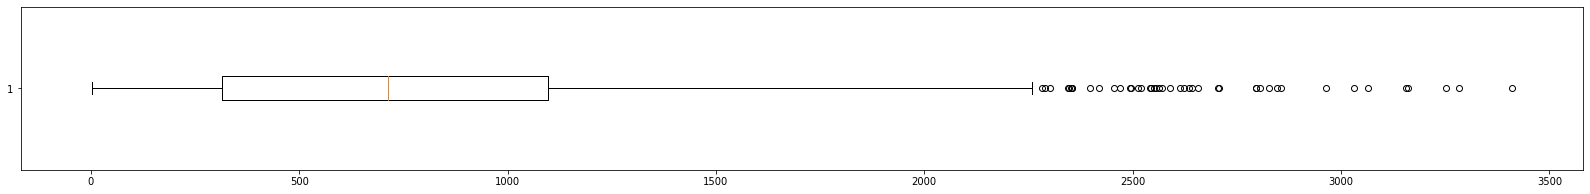

In [239]:
plt.figure(figsize = (28, 3))
plt.boxplot(data['Casual'], vert = False)
plt.show()

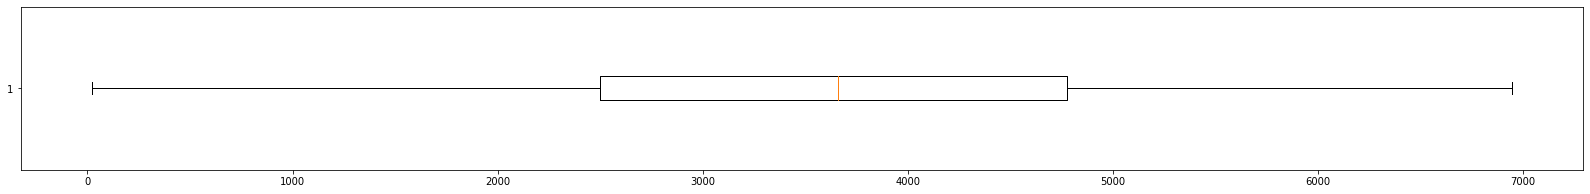

In [240]:
plt.figure(figsize = (28, 3))
plt.boxplot(data['Registered'], vert = False)
plt.show()

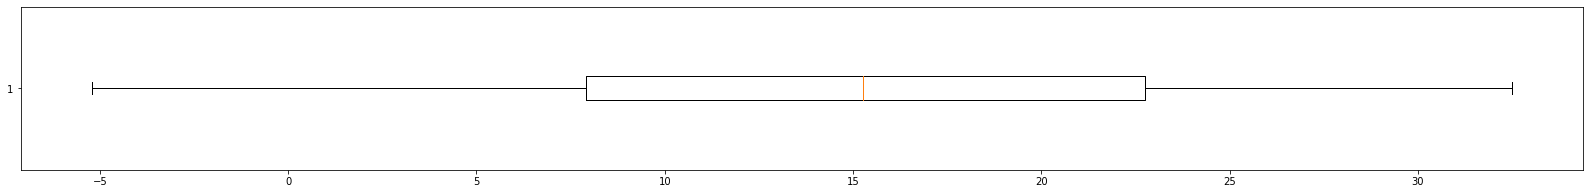

In [241]:
plt.figure(figsize = (28, 3))
plt.boxplot(data['Temp'], vert = False)
plt.show()

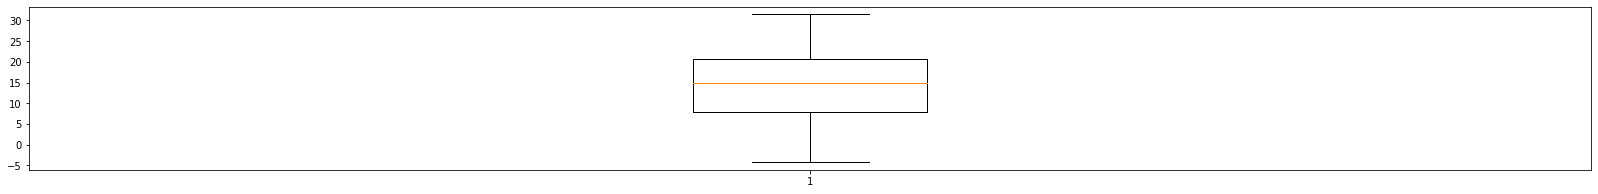

In [242]:
plt.figure(figsize = (28, 3))
plt.boxplot(data['Feel_Temp'], vert = True)
plt.show()

In [243]:
data.corr()

Temp  Feel_Temp       Hum      Wind    Casual  Registered  \
Temp        1.000000   0.987659 -0.000578 -0.143290  0.543683    0.536810   
Feel_Temp   0.987659   1.000000 -0.021285 -0.171659  0.543864    0.544192   
Hum        -0.000578  -0.021285  1.000000 -0.026731 -0.008490   -0.055816   
Wind       -0.143290  -0.171659 -0.026731  1.000000 -0.154652   -0.197764   
Casual      0.543683   0.543864 -0.008490 -0.154652  1.000000    0.395282   
Registered  0.536810   0.544192 -0.055816 -0.197764  0.395282    1.000000   
cnt         0.625057   0.631066 -0.047965 -0.214097  0.672804    0.945517   

                 cnt  
Temp        0.625057  
Feel_Temp   0.631066  
Hum        -0.047965  
Wind       -0.214097  
Casual      0.672804  
Registered  0.945517  
cnt         1.000000

### Modelo de regresión

In [244]:
data.dtypes

Date          datetime64[ns]
Season                object
Holiday               object
Weather               object
Temp                 float64
Feel_Temp            float64
Hum                  float64
Wind                 float64
Casual                 int64
Registered             int64
cnt                    int64
Grupo                 object
Dia                   object
dtype: object

In [245]:
cat_columns = data.select_dtypes(['object']).columns

### Pasando a numericas las categoricas


In [246]:
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [247]:
data

Date  Season  Holiday  Weather      Temp  Feel_Temp       Hum  \
0   2020-01-01       0        0        0  8.175849   9.090375  0.805833   
1   2020-01-02       0        0        0  9.083466   8.625733  0.696087   
2   2020-01-03       0        0        1  1.229108   0.902035  0.437273   
3   2020-01-04       0        0        1  1.400000   1.969734  0.590435   
4   2020-01-05       0        0        2  2.666979   2.775690  0.436957   
..         ...     ...      ...      ...       ...        ...       ...   
726 2021-12-27       0        0        0  3.945849   2.652174  0.652917   
727 2021-12-28       0        0        6  3.906651   3.987162  0.590000   
728 2021-12-29       0        0        4  3.906651   3.392800  0.752917   
729 2021-12-30       0        0        1  4.024151   2.889900  0.483333   
730 2021-12-31       0        0        6  2.144151   2.503889  0.577500   

          Wind  Casual  Registered   cnt  Grupo  Dia  
0    10.749882     331         654   985      0    0  
1   -16.652113     131         670   801      0    1  
2    16.636703     120        1229  1349      1    2  
3    10.739832     108        1454  1562      1    3  
4    12.522300      82        1518  1600      1    4  
..         ...     ...         ...   ...    ...  ...  
726  23.458911     247        1867  2114      0    5  
727  10.416557     644        2451  3095      0    6  
728   8.333661     159        1182  1341      0    0  
729  23.500518     364        1432  1796      1    1  
730  10.374682     439        2290  2729      0    2  

[731 rows x 13 columns]

In [248]:
scaler = StandardScaler()

### Se dropea la fecha y variable a usar para el modelo cnt y se deben eliminar las variables con alta correlacion

In [249]:
data_model=data.drop(columns=['Date','Casual','Registered'])



In [250]:
X = data_model.drop(columns=['cnt'])
Y = data_model['cnt']

In [251]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

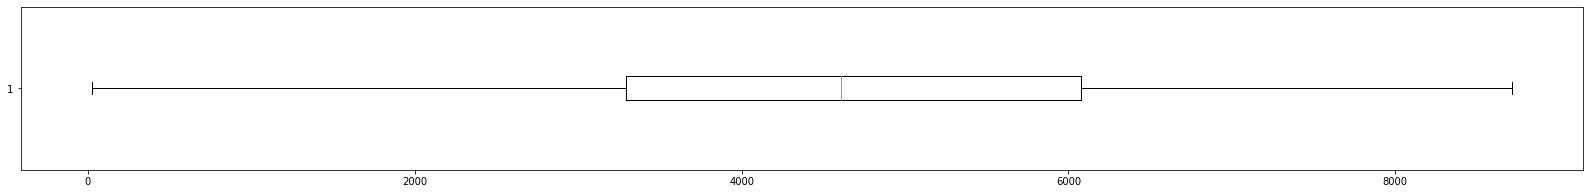

In [252]:
plt.figure(figsize = (28, 3))
plt.boxplot(Y_train, vert = False)
plt.show()

In [253]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [254]:
regr = LinearRegression()
regr.fit(X_train_scaled, Y_train)

LinearRegression()

In [255]:
regr.coef_

array([ 398.52380825,  -89.34738963, -407.65038566,  516.62574583,
        440.51027312,  -59.66653832, -150.74425991,    2.37602446,
         11.23257478])

In [256]:
regr.intercept_

4595.313356164384

In [257]:
preds_train = regr.predict(X_train_scaled)
preds_test = regr.predict(X_test_scaled)

In [259]:
print('R2 Test: {}'.format(r2_score(Y_test, preds_test)))
print('R2 Train: {}'.format(r2_score(Y_train, preds_train)))

R2 Test: 0.5486516513262212
R2 Train: 0.4585297882350752


## Regresion Polinomial (Modelo polinomial 2 y 3 grados)

In [261]:
poly_features= PolynomialFeatures(degree=2,include_bias=False)

In [262]:
X_poly_train=poly_features.fit_transform(X_train_scaled)
X_poly_test=poly_features.fit_transform(X_test_scaled)


In [263]:
ridge_reg=Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_poly_train,Y_train)
train_x_predict=ridge_reg.predict(X_poly_train)
test_x_predict=ridge_reg.predict(X_poly_test)

In [264]:
#Validacion del modelo 2 grados
R2 = format(r2_score(Y_train, train_x_predict))
print('R2 Entrenamiento: {}'.format(r2_score(Y_train, train_x_predict)))

R2 Entrenamiento: 0.6644587808375482


In [265]:
R2 = format(r2_score(Y_test, test_x_predict))
print('R2 Test: {}'.format(r2_score(Y_test, test_x_predict)))

R2 Test: -6.677475400063517


In [268]:
#Modelo

poly = PolynomialFeatures(degree = 3)
poly_X = poly.fit_transform(X)

In [269]:
poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(poly_X, Y, test_size = 0.25, random_state = 0)

polynomial_model = LinearRegression().fit(poly_X_train, poly_Y_train)

In [270]:
#Entrenamiento
Y_pred_train = polynomial_model.predict(poly_X_train)
print("MSE: %.2f" % mean_squared_error(poly_Y_train, Y_pred_train, squared =True))
print("RMSE: %.2f" % mean_squared_error(poly_Y_train, Y_pred_train, squared = False))
print("MAE: %.2f" % mean_absolute_error(poly_Y_train, Y_pred_train))
R2 = format(r2_score(poly_Y_train, Y_pred_train))
print('R2 Entrenamiento: {}'.format(r2_score(poly_Y_train, Y_pred_train)))

MSE: 790041.21
RMSE: 888.84
MAE: 708.97
R2 Entrenamiento: 0.7754689131017094


In [271]:
#Test
Y_pred_test = polynomial_model.predict(poly_X_test)
print("MSE: %.2f" % mean_squared_error(poly_Y_test, Y_pred_test, squared =True))
print("RMSE: %.2f" % mean_squared_error(poly_Y_test, Y_pred_test, squared = False))
print("MAE: %.2f" % mean_absolute_error(poly_Y_test, Y_pred_test))
R2 = r2_score(poly_Y_test, Y_pred_test)
print('R2 Test: {}'.format(r2_score(poly_Y_test, Y_pred_test)))

MSE: 12906412.22
RMSE: 3592.55
MAE: 1686.28
R2 Test: -1.91112181515398


El modelo que le presentaría a la alcaldía sería un modelo predictivo lineal pues sus R2 son bastante aceptables, para los polinomial puede existir overfitting pues el modelo no se acopla mucho a la Y que se escogió R2 negativo




● ¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de
usuarios?
● Describa cual es el escenario ideal para el incremento de usuarios.
R: Clima y su relacion con la temperatura, si miramos el profiling, podemos observar que la mayoría de usuarios o cantidad de ciclas es mucho mayor cuando la temperatura es alta y no está dentro del grupo de Rain o Mist



● ¿Qué pasos adicionales deberían tener en cuenta para una próxima
iteración/mejora del modelo?

R: Mayor cantidad de datos